In [4]:
from keras.preprocessing import image
img=image.load_img('Input_resolution.jpg')
x=image.img_to_array(img)
x.shape
import numpy as np
x = np.expand_dims(x, axis=0)
x.shape





(1, 100, 90, 3)

In [ ]:
#Reference Book:  [Navin_Kumar_Manaswi]_Deep_Learning_with_Applicati(z-lib.org).pdf

from os import path
import cv2
import os
import random
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten
from keras.layers.core import Dense,Dropout,Activation
from keras.optimizers import adam
from keras.utils import np_utils
from keras import backend as K
import matplotlib.pyplot as plt 


In [ ]:
'''





original_data_path='D:\dataset\Image\General-100'



def load_small_img_dataset(path=os.getcwd()):
    data=[]
    for image in os.listdir(path):
        if image.endswith(('.jpg','.jpeg','.png','bmp'),0,len(image)):
            pixels=cv2.imread(os.path.join(path,image))
            pixels=pixels[0:100,0:90]  #first make all images of same size using crop
            data.append(pixels)
            
    return data
    
imgs=load_small_img_dataset(original_data_path)
            
# OR import keras dataset       from keras.datasets import cifar10  
#(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')





#generate a random number between 0 and 1 and if it is less than 0.7 than the current image is in train set else fi >0.9 then test else dev set

#or use sklearn.model_selection import train_test_split

def test_train_dev_split(dataset,train=0.7,dev=0.2,test=0.1):
    #make seed for exact results everything
    #random.sort(dataset)
    random.seed(2)
    random.shuffle(dataset)
    split1=int(train*len(dataset))
    split2=int((train+dev)*len(dataset))
    
    train_set=dataset[:split1]
    dev_set=dataset[split1:split2]
    test_set=dataset[split2:]
    
    return train_set,dev_set,test_set
    
    
def create_input_out_sets(train_output,dev_output,test_output):
    train_input=[]
    dev_input=[]
    test_input=[]
    for img in train_output:
        low_pixels=cv2.resize(img,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_AREA)
        train_input.append(cv2.resize(low_pixels,None,fx=2,fy=2,interpolation=cv2.INTER_AREA))
    
    for img in dev_output:
        low_pixels=cv2.resize(img,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_AREA)
        dev_input.append(cv2.resize(low_pixels,None,fx=2,fy=2,interpolation=cv2.INTER_AREA))
    
    for img in test_output:
        low_pixels=cv2.resize(img,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_AREA)
        test_input.append(cv2.resize(low_pixels,None,fx=2,fy=2,interpolation=cv2.INTER_AREA))

        
    return np.array(train_input),np.array(train_output),np.array(dev_input),np.array(dev_output),np.array(test_input),np.array(test_output)

#check wheather the imgs were correctly formed
train,dev,test=test_train_dev_split(imgs)
print("[INFO] Splitting done....")

train_in,train_out,dev_in,dev_out,test_in,test_out=create_input_out_sets(train,dev,test)
print("[INFO] Input and output images created and sorted in datasets")


cv2.imshow("Original Img",train_out[1])
cv2.imshow("Low resolution",train_in[1])
cv2.waitKey(0)
cv2.destroyAllWindows()

print("[INFO] Shape of image",test_in[1].shape)



#pre-Process Images :


Both TensorFlow and Theano expects a 4 dimensional tensor as input. 
But where TensorFlow expects the 'channels' dimension as the last dimension 
(index 3, where the first is index 0) of the tensor – i.e. tensor with shape (samples, rows, cols, channels) – 
Theano will expect 'channels' at the second dimension (index 1) – 
i.e. tensor with shape (samples, channels, rows, cols). 

# Keras Format:: [samples][width][height][channels]
# OpenCV format::  rows, columns and channels i.e. [height][width][channels]

# Current format:: [samples][height][width][channels]   ->>>>>>   [samples][width][height][channels]


# Reshape input data.
train_in=train_in.reshape(train_in.shape[0],90,100,3)
train_out=train_out.reshape(train_out.shape[0],90,100,3)
dev_in=dev_in.reshape(dev_in.shape[0],90,100,3)
dev_out=dev_out.reshape(dev_out.shape[0],90,100,3)
test_in=test_in.reshape(test_in.shape[0],90,100,3)
test_out=test_out.reshape(test_out.shape[0],90,100,3)


# to convert our data type to float32 and normalize our database
train_in=train_in.astype('float32')
dev_in=dev_in.astype('float32')
test_in=test_in.astype('float32')
print(train_in.shape)
print(test_in.shape)


# Z-scoring or Gaussian Normalization
train_in=train_in - np.mean(train_in) / train_in.std()
dev_in=dev_in - np.mean(dev_in) / dev_in.std()
test_in=test_in - np.mean(test_in) / test_in.std()
'''

In [5]:
'''#Saving into numpy arrays
np.save('train_in.npy',train_in)
np.save('train_out.npy',train_out)
np.save('dev_in.npy',dev_in)
np.save('dev_out.npy',dev_out)
np.save('test_in.npy',test_in)
np.save('test_out.npy',test_out)'''



In [ ]:
# Load data from saved numpy arrays


train_in=np.load('train_in.npy')
train_out=np.load('train_out.npy')
dev_in=np.load('dev_in.npy')
dev_out=np.load('dev_out.npy')
test_in=np.load('test_in.npy')
test_out=np.load('test_out.npy')

In [6]:
'''
Image Super-Resolution Using Deep
Convolutional Networks
Chao Dong[2015]
'''

# Define the keras DNN model
model =Sequential()
model.add(Conv2D(64,(9,9),input_shape=(100,90,3),activation='relu',padding='same'))
#model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3)) 
model.add(Conv2D(32,(1,1),activation='relu',padding='same'))
#model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3)) 
model.add(Conv2D(3,(5,5),activation='relu',padding='same'))
#model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3)) 


print("Models' output Shape: ",model.output_shape)



Models' output Shape:  (None, 100, 90, 3)


In [12]:

def psnr(y_true, y_pred):
    '''assert y_true.shape == y_pred.shape, "Cannot calculate PSNR. Input shapes not same." \
                                         " y_true shape = %s, y_pred shape = %s" % (str(y_true.shape),
                                                                                   str(y_pred.shape))
    '''
    """
    PSNR is Peek Signal to Noise Ratio, which is similar to mean squared error.
    It can be calculated as
    PSNR = 20 * log10(MAXp) - 10 * log10(MSE)
    When providing an unscaled input, MAXp = 255. Therefore 20 * log10(255)== 48.1308036087.
    However, since we are scaling our input, MAXp = 1. Therefore 20 * log10(1) = 0.
    Thus we remove that component completely and only compute the remaining MSE component.
    """
    return -10. * K.log(K.mean(K.square(y_pred - y_true))) / K.log(10.)



#compile the model algong with adam optimiser along with PSNR/SSIM loss metric
model.compile(optimizer=adam(0.01),metrics=[psnr],loss='mse')
model.fit(train_in,train_out,batch_size=10,nb_epoch=50,validation_data=(dev_in,dev_out))
'''#loading saved weights
modelWts=model.load_weights('savedWeightsCNN.h5')
'''

#evaluate the model
score=model.evaluate(test_in,test_out)
print("[INFO] MSE:{0}   PSNRLoss:{1}".format(score[0],score[1]))



c:\users\ravi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:21: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 69 samples, validate on 20 samples
Epoch 1/50
69/69 [==============================] - 11s 160ms/step - loss: 14569.5709 - psnr: -41.5923 - val_loss: 22360.5537 - val_psnr: -43.4866
Epoch 2/50
69/69 [==============================] - 10s 150ms/step - loss: 11471.7664 - psnr: -40.5678 - val_loss: 22298.6709 - val_psnr: -43.4745
Epoch 3/50
69/69 [==============================] - 10s 149ms/step - loss: 10604.1741 - psnr: -40.1850 - val_loss: 13119.5229 - val_psnr: -41.1682
Epoch 4/50
69/69 [==============================] - 10s 152ms/step - loss: 9881.9288 - psnr: -39.8654 - val_loss: 13353.0020 - val_psnr: -41.2431
Epoch 5/50
69/69 [==============================] - 10s 149ms/step - loss: 9065.7134 - psnr: -39.5537 - val_loss: 6747.3574 - val_psnr: -38.2764
Epoch 6/50
69/69 [==============================] - 11s 160ms/step - loss: 8905.2961 - psnr: -39.3676 - val_loss: 5165.4797 - val_psnr: -37.1099
Epoch 7/50
69/69 [==============================] - 12s 178ms/step - loss: 9705

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Peredicted resolution shape : [[[52.817448 48.997665 47.04327 ]
  [59.8298   54.90462  54.360523]
  [62.118942 56.859947 56.37574 ]
  ...
  [49.273613 53.5224   50.623726]
  [39.359886 43.03825  40.51571 ]
  [29.536192 32.55811  30.476841]]

 [[68.99388  62.29484  60.450085]
  [76.531876 68.55346  68.74013 ]
  [79.21521  71.00317  70.6515  ]
  ...
  [61.248306 66.87212  63.431763]
  [49.7593   54.68743  51.58078 ]
  [37.528683 41.592438 39.063408]]

 [[81.44875  73.381905 71.98701 ]
  [88.56032  78.85114  80.243324]
  [91.660194 81.4537   81.87506 ]
  ...
  [70.818596 78.50235  74.174   ]
  [58.276447 65.056175 61.10417 ]
  [44.240467 49.754925 46.50633 ]]

 ...

 [[ 0.        0.        0.      ]
  [ 0.        0.        0.      ]
  [ 0.        0.        0.      ]
  ...
  [77.98389  87.82188  88.73681 ]
  [65.01819  73.77387  74.192024]
  [49.072052 56.039585 56.23594 ]]

 [[ 0.        0.        0.      ]
  [ 0.        0.        0.      ]
  [ 0.        0.        0.      ]
  ...
  [78.61

True

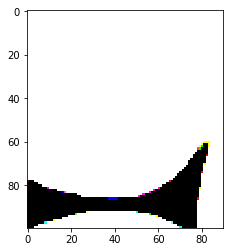

In [19]:
#print("TEST image shape: ",test_in[0].shape) 

# prediction

#unknown test data
#cv2.imshow("Original Img",test_original_resolution[0])
#cv2.imshow("Low resolution",test_imgs[0])
pred_image=model.predict(test_in[4:5])
'''cv2.imshow("Peredicted resolution",pred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()'''


print("Peredicted resolution shape :",pred_image[0])

'''#save img
plt.subplot(221)
plt.imshow(test_in[2])

plt.subplot(222)
plt.imshow(test_out[2])

plt.subplot(223)
'''
plt.imshow(pred_image[0])



cv2.imwrite("Original_Img4.jpg",test_out[4])
cv2.imwrite("Input_resolution4.jpg",test_in[4])
cv2.imwrite("Test_Output4.jpg",pred_image[0])

In [49]:
'''for i in range(0,len(test_in)):
    cv2.imwrite("{0}.png".format(i),test_in[i])'''

In [14]:

#Save the model
model.save('resoluteitmodelCNN_F.h5')
jsonmodel=model.to_json()
model.save_weights('savedWeightsCNN_F.h5')


print(model.summary())

#loading saved weights
#modelWts=model.load_weights('savedWeightsCNN.h5')
#model.get_weights()
#model.get_config()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 90, 64)       15616     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 90, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 90, 32)       2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 90, 32)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 90, 3)        2403      
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 90, 3)        0         
Total params: 20,099
Trainable params: 20,099
Non-trainable params: 0
_________________________________________________________________
None
